# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probalities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_token = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

### The Dot Product 

In [5]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is ', c.shape)
print(c)

shape of c is  (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [8]:
print(a.dot(c))
print('shape of the dot product is', a.dot(c).shape)

[21  9]
shape of the dot product is (2,)


In [9]:
X_test.dot(prob_token_spam).shape

(1724,)

## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [10]:
PROB_SPAM = 0.3116

In [11]:
np.log(prob_token_spam)[:5]

array([-4.40750247, -5.25357728, -4.98997971, -4.48228141, -4.98833768])

## Joint Probability in Log Format

In [12]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_token)) + np.log(PROB_SPAM)

In [13]:
joint_log_spam[:5]

array([24.27580867,  2.15999942, 20.59075715, 17.74776262, 20.50984493])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1 - P(Spam))} {P(X)}$$

In [14]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_token)) + np.log(1 - PROB_SPAM)

In [15]:
joint_log_ham[:5]

array([-60.96824846, -11.00905316, -37.9678354 , -59.13066195,
       -53.80247296])

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
**OR** 
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [16]:
prediction = joint_log_spam > joint_log_ham

In [17]:
prediction[-5:]*1

array([1, 0, 0, 0, 0])

In [18]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam \,) \, P(Spam) ≠ \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [19]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [20]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)

numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1685
Docs classified incorrectly 39


In [21]:
# Accuracy
round(correct_docs / len(X_test), 2)

0.98

In [22]:
fraction_wrong = numdocs_wrong / len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74%


## Visualising the Results

In [23]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14500, stop=1, num=1000)

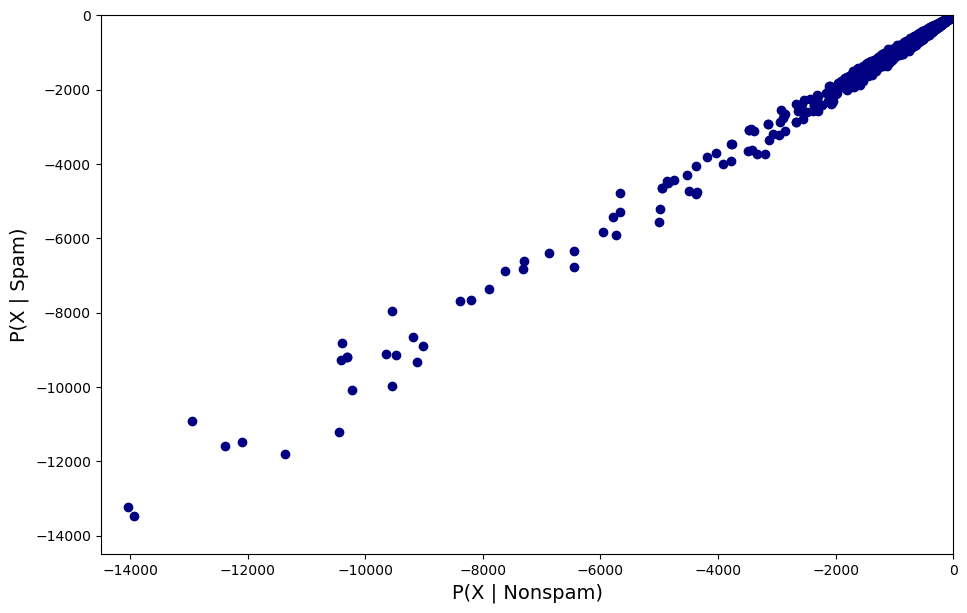

In [24]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# set scale 
plt.xlim([-14500, 1])
plt.ylim([-14500, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

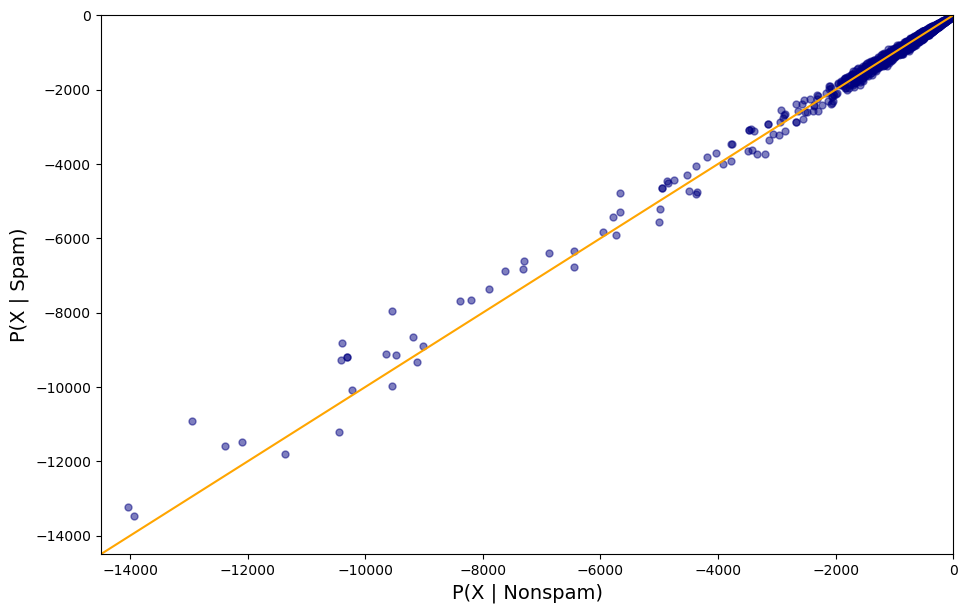

In [25]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# set scale 
plt.xlim([-14500, 1])
plt.ylim([-14500, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

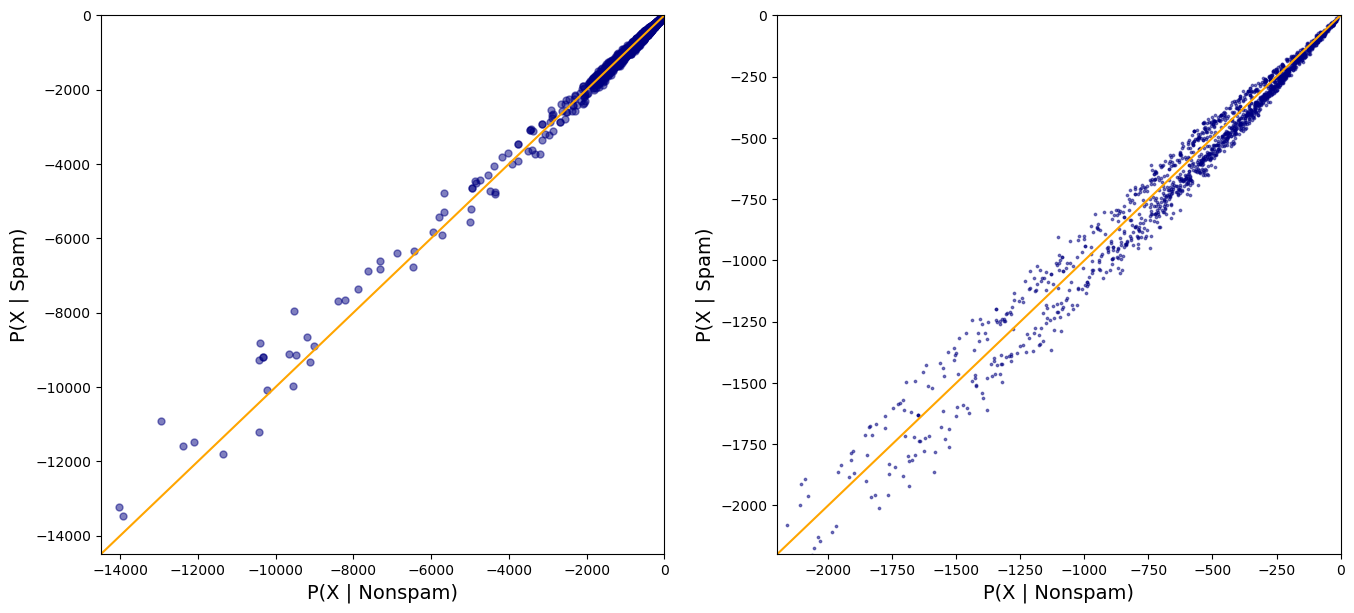

In [26]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale 
plt.xlim([-14500, 1])
plt.ylim([-14500, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale 
plt.xlim([-2200, 1])
plt.ylim([-2200, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [27]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                          labels: y_test})

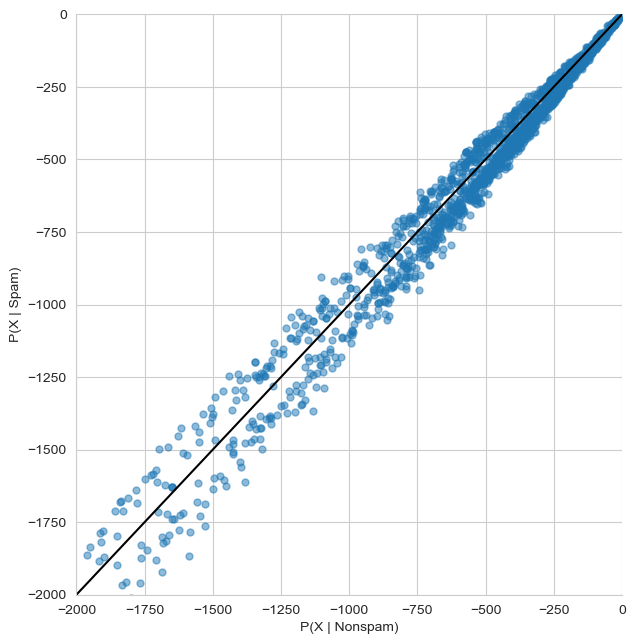

In [28]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')
plt.show()

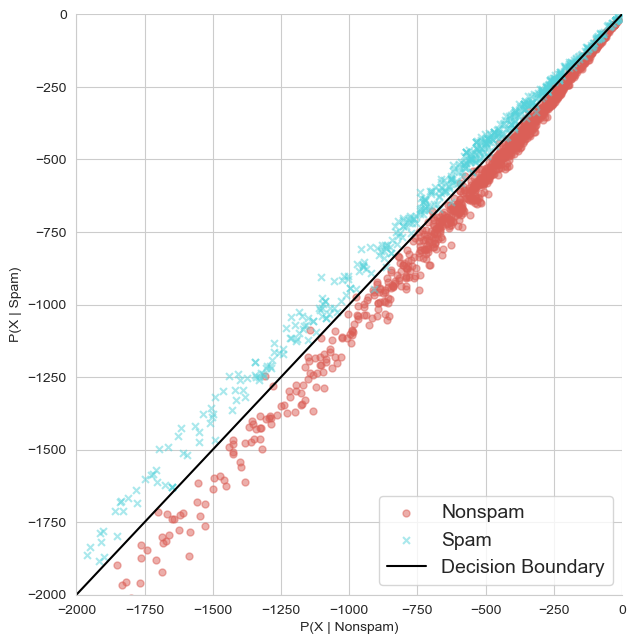

In [29]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'],
          palette='hls', legend=False)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)

plt.show()

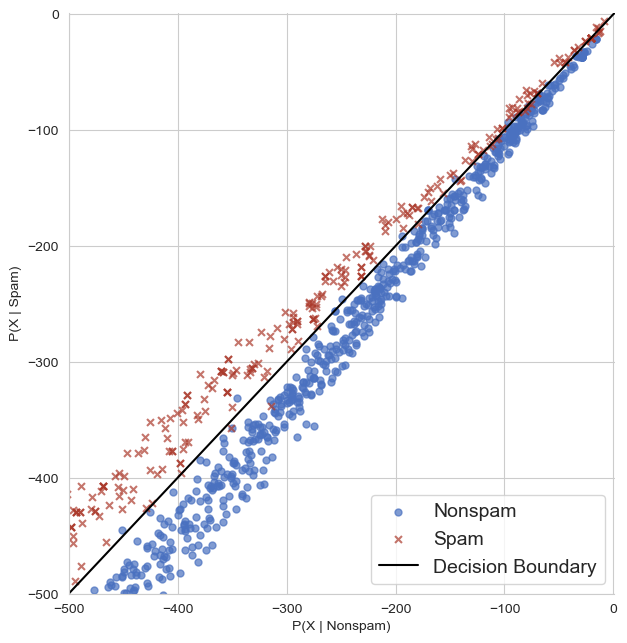

In [30]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'],
          palette=my_colors, legend=False)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Nonspam', 'Spam', 'Decision Boundary'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

In [31]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [32]:
true_pos = (y_test == 1) & (prediction == 1)

In [33]:
true_pos.sum()

569

In [38]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [37]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

## Recall Score

In [44]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 96.60%


## Precision Score

In [47]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.968


## F-Score or F1 Score

In [49]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.97
